# Wind Turbine Power Production
###  Project Downtime Analysis


---

## Table of Contents

* [Overview](#overview)
* [Wind Turbine Dataset – Column Descriptions](#wind-turbine-dataset---column-descriptions)
* [Data Loading & Initial Inspection](#data-loading--initial-inspection)
* [Datetime Conversion](#datetime-conversion)
* [Renaming of Columns](#renaming-of-columns)
* [Feature Extraction](#feature-extraction)
  * [Year, Month, Day, Time](#year-month-day-time)
  * [% Power Generation](#-power-generation)
* [Find Null Values](#find-null-values)
* [Descriptive Statistics](#descriptive-statistics)
* [📊 Inference Summary](#-inference-summary)
* [Correlation of Columns](#correlation-of-columns)
* [Downtime Analysis](#downtime-analysis)
  1. [When the turbine was down](#1-when-the-turbine-was-down)
  2. [Why Was the Turbine Down?](#2-why-was-the-turbine-down)
     * [a) Non‑operational Turbine (Status ≠ 100)](#a-non-operational-turbine-status--100)
     * [b) Wind Speed Below Cut‑in Speed](#b-wind-speed-below-cut-in-speed)
     * [c) Wind Speed Above Cut‑in but Low Power](#c-wind-speed-above-cut-in-but-low-power)
  3. [How long it was down](#3-how-long-it-was-down)
     * [a) Wind Speed Condition Summary](#a-wind-speed-condition-summary)
     * [b) Operational vs Non‑operational Summary](#b-operational-vs-non-operational-summary)
  4. [Power/Energy Lost During Downtime](#4-powerenergy-lost-during-downtime)
* [🛠️ Problem Statement](#️-problem-statement)

### Overview. <a name="overview"></a>
___

In this project, we perform a detailed downtime analysis of wind turbines using a real-world dataset. The goal is to assess how turbine availability, wind conditions, and power generation performance vary over time and identify patterns or anomalies that might explain turbine underperformance.

Key focus areas:

  - Understanding the relationship between wind speed, LIDAR readings, and power output.

  - Identifying operational and non-operational periods using the Turbine Status.

  - Evaluating actual vs expected power and generation values to estimate efficiency.

  - Highlighting periods of missing or zero output to investigate possible causes of downtime.

  - Providing statistical summaries and visual correlations to support engineering decisions.

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

from datetime import time 

# Plotting.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set.
df = pd.read_csv("/kaggle/input/wind-turbine-data/WTG_data_V2.csv")

# Display the data frame.
df

,Date/Time,Lidar- 60m,Lidar- 140m,Lidar- 200m,Nasal Wind Speed,WS round,Actual Power,Turbine Status,Actual Gen,"Expected, Power","Expec, Gen"
0,13-12-2024 11:00,10.980,10.93,10.840,11.637102,11.6,3346.400049,100.0,557.733342,3300.0,550.0
1,13-12-2024 11:30,11.420,12.16,12.200,11.098290,11.1,3338.854028,100.0,556.475671,3300.0,550.0
2,23-01-2025 22:40,9.965,12.62,14.599,12.718717,12.7,1816.368982,100.0,302.728164,3300.0,550.0
3,23-01-2025 22:50,9.700,12.62,14.726,12.014935,12.0,1891.144006,100.0,315.190668,3300.0,550.0
4,23-01-2025 23:00,9.698,13.00,14.726,11.715595,11.7,1952.096973,100.0,325.349495,3300.0,550.0
...,...,...,...,...,...,...,...,...,...,...,...
12354,17-01-2025 07:50,9.335,11.95,13.516,12.056178,12.1,3340.761987,100.0,556.793664,3300.0,550.0
12355,17-01-2025 08:00,9.080,10.66,12.253,11.647745,11.6,3334.629004,100.0,555.771501,3300.0,550.0
12356,17-01-2025 08:10,8.901,10.57,12.082,11.586546,11.6,3338.308984,100.0,556.384831,3300.0,550.0
12357,17-01-2025 08:30,7.990,10.59,12.214,12.404742,12.4,3335.372021,100.0,555.895337,3300.0,550.0


### Wind Turbine Dataset - Column Descriptions

- **Date/Time**  
  Timestamp of the measurement, in “DD MM YYYY HH:MM” format. Indicates the exact date and time (to the nearest 10 minutes) when the data was recorded.

- **Lidar- 60m,140m,200m (meter)**  
  LIDAR (Light Detection and Ranging) is a remote sensing technology that measures wind speed at various heights (60m, 140m, and 200m above ground level). These measurements help assess wind profiles and turbine efficiency at different elevations.

- **Actual Power (kW)**  
  The actual electrical power output measured at the turbine’s low-voltage side, in kilowatts. This is the real power being delivered to the grid at that moment.

- **Actual Genration (kWh)**  
  The total electrical energy generated during the measurement interval, expressed in kilowatt-hours. This indicates how much energy the turbine has produced over time.

  
- **Turbine Status**  
    Indicates whether the turbine is operational or not. A status of 100 means the turbine is operational; any other value suggests it is not in operation.

- **Wind Speed (m/s)**  
  The instantaneous wind speed at the turbine hub (or nearby anemometer), in meters per second. This drives the rotor and directly affects power output.

- **Expected, Power (KW)**  
  The expected or “ideal” energy output (often integrated over the measurement interval) based on the turbine’s manufacturer-provided power curve, given the measured wind speed.

- **Expected Generation (kWh)**  
  The estimated energy output (in kilowatt-hours) based on the expected power and the duration of the measurement interval. It represents how much energy the turbine should have generated.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12359 entries, 0 to 12358
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         12359 non-null  object 
 1   Lidar- 60m        12359 non-null  float64
 2   Lidar- 140m       12359 non-null  float64
 3   Lidar- 200m       12359 non-null  float64
 4   Nasal Wind Speed  12018 non-null  float64
 5   WS round          12018 non-null  float64
 6   Actual Power      12018 non-null  float64
 7   Turbine Status    12018 non-null  float64
 8   Actual Gen        12018 non-null  float64
 9   Expected, Power   12018 non-null  float64
 10  Expec, Gen        12018 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.0+ MB


- all datatype are in correct format , Except Data/time -> lest make date time formate
- but we can see there are some missing values , which is reflected in Non null count

In [4]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.dtypes

Date/Time           datetime64[ns]
Lidar- 60m                 float64
Lidar- 140m                float64
Lidar- 200m                float64
Nasal Wind Speed           float64
WS round                   float64
Actual Power               float64
Turbine Status             float64
Actual Gen                 float64
Expected, Power            float64
Expec, Gen                 float64
dtype: object

### Renaming of column

In [5]:
df.columns = ['Date_Time', 'Lidar_60m', 'Lidar_140m', 'Lidar_200m', 'Wind_Speed_ms','Wind_Speed_round','Actual_Power','Turbine_Status','Actual_Gen','Expected_Power','Expected_Generation']
df.head()

,Date_Time,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,Expected_Generation
0,2024-12-13 11:00:00,10.980,10.93,10.840,11.637102,11.6,3346.400049,100.0,557.733342,3300.0,550.0
1,2024-12-13 11:30:00,11.420,12.16,12.200,11.098290,11.1,3338.854028,100.0,556.475671,3300.0,550.0
2,2025-01-23 22:40:00,9.965,12.62,14.599,12.718717,12.7,1816.368982,100.0,302.728164,3300.0,550.0
3,2025-01-23 22:50:00,9.700,12.62,14.726,12.014935,12.0,1891.144006,100.0,315.190668,3300.0,550.0
4,2025-01-23 23:00:00,9.698,13.00,14.726,11.715595,11.7,1952.096973,100.0,325.349495,3300.0,550.0


### Extract day , month , year , time and actual/expected power genration percantage columns

In [6]:
df['Year'] = df['Date_Time'].dt.year
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Time'] = df['Date_Time'].dt.time
df['%_power_gen'] = (df['Actual_Power'] / df['Expected_Power']).replace([np.inf, -np.inf], 0) * 100
df['%_Energy_gen'] = (df['Actual_Gen'] / df['Expected_Generation']).replace([np.inf, -np.inf], 0) * 100
df.head()

,Date_Time,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,Expected_Generation,Year,Month,Day,Time,%_power_gen,%_Energy_gen
0,2024-12-13 11:00:00,10.980,10.93,10.840,11.637102,11.6,3346.400049,100.0,557.733342,3300.0,550.0,2024,12,13,11:00:00,101.406062,101.406062
1,2024-12-13 11:30:00,11.420,12.16,12.200,11.098290,11.1,3338.854028,100.0,556.475671,3300.0,550.0,2024,12,13,11:30:00,101.177395,101.177395
2,2025-01-23 22:40:00,9.965,12.62,14.599,12.718717,12.7,1816.368982,100.0,302.728164,3300.0,550.0,2025,1,23,22:40:00,55.041484,55.041484
3,2025-01-23 22:50:00,9.700,12.62,14.726,12.014935,12.0,1891.144006,100.0,315.190668,3300.0,550.0,2025,1,23,22:50:00,57.307394,57.307394
4,2025-01-23 23:00:00,9.698,13.00,14.726,11.715595,11.7,1952.096973,100.0,325.349495,3300.0,550.0,2025,1,23,23:00:00,59.154454,59.154454


### Find Null values

In [7]:
df.isna().sum()

Date_Time                0
Lidar_60m                0
Lidar_140m               0
Lidar_200m               0
Wind_Speed_ms          341
Wind_Speed_round       341
Actual_Power           341
Turbine_Status         341
Actual_Gen             341
Expected_Power         341
Expected_Generation    341
Year                     0
Month                    0
Day                      0
Time                     0
%_power_gen            342
%_Energy_gen           342
dtype: int64

- Here data says that , out off all 200 values present, only 1 row has all th value others are empty.
- so we will keep that row and remove other rows

### Generate descriptive statistics.

In [8]:
df.describe()

,Date_Time,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,Expected_Generation,Year,Month,Day,%_power_gen,%_Energy_gen
count,12359,12359.000000,12359.000000,12359.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12018.000000,12359.000000,12359.000000,12359.00000,12017.000000,12017.000000
mean,2025-01-18 16:09:58.931952640,5.565971,6.279782,6.791010,5.928911,5.929314,1022.272283,94.106923,170.378714,1246.224180,207.704030,2024.702727,4.641395,15.94862,176.320139,176.320139
min,2024-12-06 00:00:00,0.104000,0.120000,0.210000,0.481000,0.500000,-74.251001,1.000000,-12.375167,0.000000,0.000000,2024.000000,1.000000,1.00000,-820.000000,-820.000001
25%,2024-12-27 22:35:00,4.020000,4.300000,4.480000,3.653371,3.700000,255.348252,96.000000,42.558042,140.400000,23.400000,2024.000000,1.000000,9.00000,45.122345,45.122345
50%,2025-01-18 20:50:00,5.575000,6.040000,6.350000,5.724139,5.700000,603.991503,100.000000,100.665250,863.600000,143.933333,2025.000000,2.000000,16.00000,84.694358,84.694358
75%,2025-02-09 09:55:00,7.060000,8.020000,8.743000,7.975508,8.000000,1642.836264,100.000000,273.806044,2335.000000,389.166667,2025.000000,12.000000,23.00000,103.512381,103.512381
max,2025-03-03 00:00:00,11.870000,15.930000,18.830000,16.411907,16.400000,3352.432007,100.000000,558.738668,3300.000000,550.000000,2025.000000,12.000000,31.00000,18068.071429,18068.071453
std,NaN,2.098151,2.657595,3.108894,2.812823,2.812801,1029.276468,11.421332,171.546078,1184.888222,197.481370,0.457076,4.809401,8.61014,622.160799,622.160799


### 📊 Wind Turbine Dataset – Inference Summary

#### 🌬️ Wind Profile via LIDAR Readings
- **Mean wind speed increases with height:**
  - `Lidar_60m`: 5.57 m/s  
  - `Lidar_140m`: 6.28 m/s  
  - `Lidar_200m`: 6.79 m/s  
  ➤ *Wind speed naturally increases with altitude due to lower surface friction.*

- **Variability also increases with height** (standard deviation):
  - More fluctuation is observed at higher elevations.

---

#### ⚡ Turbine Performance
- **Actual Power Output:**
  - Mean: ~1022 kW  
  - Median: ~604 kW  
  - Max: 3352 kW  
  - Min: -74 kW *(negative values suggest when turbine in idle state it consumes a small amount of power for internal systems, resulting in net negative power output)*

- **Expected Power Output:**
  - Mean: ~1246 kW  
  - Median: ~864 kW
  - Max: ~3300 kWh  
  ➤ *On average, the turbine underperforms as Actual Power < Expected Power.*

---

#### 🔋 Energy Generation (kWh)
- **Actual Generation:**
  - Mean: ~170.38 kWh  
  - Median: ~100.67 kWh  
  - Max: ~559 kWh  

- **Expected Generation:**
  - Mean: ~207.70 kWh  
  ➤ *Actual generation is often lower than expected, suggesting efficiency losses.*

---

#### 🏗️ Turbine Operational Status
- Mean: 94.11  
- Max: 100  
- Min: 1  
➤ *The turbine is operational most of the time, with minor downtimes.*

---

#### 🌪️ Wind Speed at Hub Height
- Mean: 5.93 m/s  
- Median: 5.72 m/s  
- 75th Percentile: 7.98 m/s  
➤ *Wind conditions are generally favorable for turbine operation.*

---

#### ✅ Overall Insights
- ⚠️ **Turbine underperformance:** Actual power and generation are consistently lower than expected.
- 🌬️ **Wind speed increases with height** — confirming the usefulness of LIDAR sensors at multiple levels.
- 🔄 **Turbine availability is high** — operational ~95% of the time.
- 📉 **Data cleaning recommended** — negative values in power and generation should be filtered.

### Correlation of columns

In [9]:
df_numerical = df[['Lidar_60m', 'Lidar_140m', 'Lidar_200m', 'Wind_Speed_ms','Wind_Speed_round','Actual_Power','Turbine_Status','Actual_Gen','Expected_Power','Expected_Generation']].corr()

<Axes: >

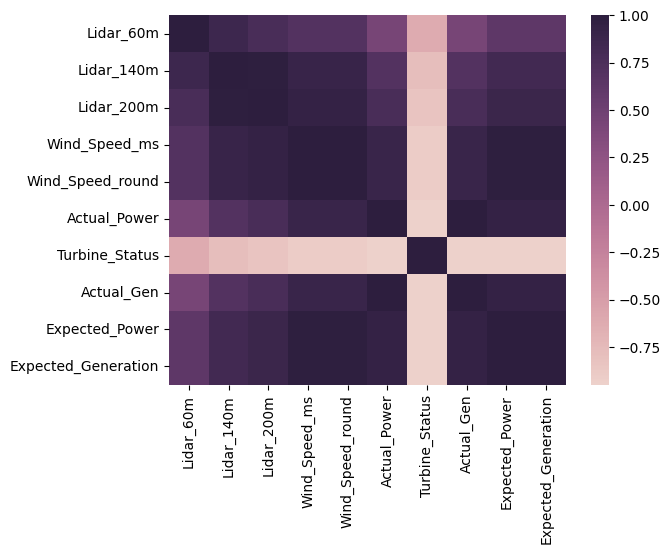

In [10]:
sns.heatmap(df_numerical.corr(), cmap=sns.cubehelix_palette(as_cmap=True))

- all coolumns are highly correlated

In [11]:
df_numerical

,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,Expected_Generation
Lidar_60m,1.000000,0.891893,0.828347,0.847443,0.847418,0.722767,0.494416,0.722767,0.796280,0.796280
Lidar_140m,0.891893,1.000000,0.976232,0.927891,0.927849,0.815878,0.475547,0.815878,0.880082,0.880082
Lidar_200m,0.828347,0.976232,1.000000,0.937378,0.937351,0.840265,0.459972,0.840265,0.893867,0.893867
Wind_Speed_ms,0.847443,0.927891,0.937378,1.000000,0.999948,0.906077,0.491460,0.906077,0.964643,0.964643
Wind_Speed_round,0.847418,0.927849,0.937351,0.999948,1.000000,0.906066,0.491367,0.906066,0.964701,0.964701
Actual_Power,0.722767,0.815878,0.840265,0.906077,0.906066,1.000000,0.375834,1.000000,0.920099,0.920099
Turbine_Status,0.494416,0.475547,0.459972,0.491460,0.491367,0.375834,1.000000,0.375834,0.369043,0.369043
Actual_Gen,0.722767,0.815878,0.840265,0.906077,0.906066,1.000000,0.375834,1.000000,0.920099,0.920099
Expected_Power,0.796280,0.880082,0.893867,0.964643,0.964701,0.920099,0.369043,0.920099,1.000000,1.000000
Expected_Generation,0.796280,0.880082,0.893867,0.964643,0.964701,0.920099,0.369043,0.920099,1.000000,1.000000


---

# Downtime Analysis

#### In Downtime Analysis, we expected to identify when and why the wind turbine was not generating power, despite wind being available, by analyzing logs/data. The goal is to:

🎯 Find out:
1) When the turbine was down.

2) Why it was down.

3) How long it was down.

4) How much power or energy was lost during that period.

## 1) When the turbine was down.

- when actual power does not meet with expected power

```mermaid
flowchart TD
    A[Downtime] --> B{Is wind speed > cut-in?}
    B -- No --> C[Not a downtime]
    B -- Yes --> D{Is power > 0?}
    D -- Yes --> E{Is power < 100% Expected Gen.}
    E -- Yes --> G[Power Degradation]
    E -- No --> H[Expected Yield Met]
    D -- No --> F[Downtime]

    style F fill:#ffcccc,stroke:#ff0000,stroke-width:2px
    style G fill:#ffe6e6,stroke:#ff0000,stroke-width:2px
    style H fill:#ccffcc,stroke:#009900,stroke-width:2px

In [12]:
# when percentage of generation is less than 100, means that actual power not met with expected power.
df_low_power_gen = df[df['%_power_gen']<100]
df_low_power_gen

,Date_Time,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,Expected_Generation,Year,Month,Day,Time,%_power_gen,%_Energy_gen
2,2025-01-23 22:40:00,9.965,12.62,14.599,12.718717,12.7,1816.368982,100.0,302.728164,3300.0,550.0,2025,1,23,22:40:00,55.041484,55.041484
3,2025-01-23 22:50:00,9.700,12.62,14.726,12.014935,12.0,1891.144006,100.0,315.190668,3300.0,550.0,2025,1,23,22:50:00,57.307394,57.307394
4,2025-01-23 23:00:00,9.698,13.00,14.726,11.715595,11.7,1952.096973,100.0,325.349495,3300.0,550.0,2025,1,23,23:00:00,59.154454,59.154454
5,2025-01-23 23:10:00,9.631,13.04,14.885,11.790098,11.8,1905.023999,100.0,317.504000,3300.0,550.0,2025,1,23,23:10:00,57.728000,57.728000
6,2025-01-23 23:20:00,9.856,12.99,14.815,12.247755,12.2,1928.463013,100.0,321.410502,3300.0,550.0,2025,1,23,23:20:00,58.438273,58.438273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272,2025-01-14 22:00:00,7.188,10.15,12.200,11.063699,11.1,3108.469995,100.0,518.078332,3300.0,550.0,2025,1,14,22:00:00,94.196060,94.196060
12273,2025-01-14 22:20:00,7.907,10.61,12.521,11.065030,11.1,3196.431982,100.0,532.738664,3300.0,550.0,2025,1,14,22:20:00,96.861575,96.861575
12298,2025-01-16 20:00:00,8.024,11.12,12.254,10.998510,11.0,2163.122961,100.0,360.520493,3300.0,550.0,2025,1,16,20:00:00,65.549181,65.549181
12299,2025-01-16 22:20:00,9.154,12.39,14.402,11.295189,11.3,3142.540979,100.0,523.756830,3300.0,550.0,2025,1,16,22:20:00,95.228515,95.228515


-  we have 7958 records which have less power genration out of total records 12359.

## 2) Why Was the Turbine Down?

##### a) **Non-operational Turbine (`Status ≠ 100`)**
- In this situation, lower or no power generation is expected and not a cause for immediate concern.
- However, if the turbine remains non-operational for **extended periods (multiple hours or days)**, it should be investigated.

##### b) **Wind Speed Below Cut-in Speed**
- When wind speed is below the cut-in threshold, less or no power generation is expected.
- Again, while this is normal, a **prolonged duration** of low wind speed should be noted and monitored.

##### c) **Wind Speed Above Cut-in Speed, but Power is Low**
- This situation requires closer attention.

  - If the turbine is **non-operational** (`Status <= 100`):  
    → Power drop is expected but **should not persist** for long durations.

  - If the turbine is **operational** (`Status = 100`):  
    → This is **a major concern**, as power should be generated. Possible causes include:
    - Sensor or communication errors  
    - Nacelle misalignment or yaw system error  
    - SCADA-controlled shutdown due to safety limits  
    - Electrical failures  
    - Other internal faults — in such cases, it's best to contact the **turbine vendor** for a detailed inspection or diagnostics.

## 3) How long it was down.

##### a) lets find how many time turbine was above and below wind cut-in speed

- find how many days per month are involved in our data

In [13]:
df_days = df.groupby('Month')['Day'].agg(lambda x: sorted(x.unique())).reset_index()
df_days['Total days'] = df_days['Day'].apply(len)
df_days

,Month,Day,Total days
0,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",31
1,2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",28
2,3,"[1, 2, 3]",3
3,12,"[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1...",26


#### Total Number of Days

- We have data for only 4 months.
- For **December 2024**, data is available from **6th Dec to 31st Dec** — a total of **26 days**.
- For **January**, we have data for **all 31 days**.
- **February** has **28 days**, and we have data for all **28 days**.
- For **March**, we do **not have full data** — only **3 days** are available.

In [14]:
## cut in speed where power just > 0 
cut_in_point = df[df['Expected_Power'] > 0].sort_values('Wind_Speed_ms').iloc[0]
cut_in_speed = cut_in_point['Wind_Speed_ms']
print('cut_in_speed = ',cut_in_speed)

cut_in_speed =  2.55


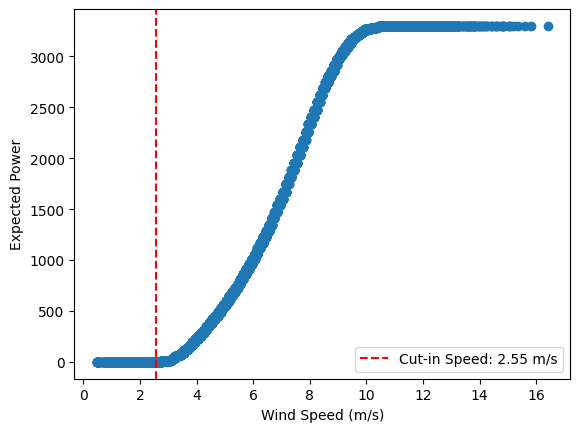

In [15]:
plt.scatter(df['Wind_Speed_ms'], df['Expected_Power'])
plt.axvline(x=cut_in_speed, color='red', linestyle='--', label=f'Cut-in Speed: {cut_in_speed:.2f} m/s')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Expected Power')
plt.legend()
plt.show()

-  we found cut in speed is **2.55 m/s** , as per out data where power greater then zero

In [16]:
df_low_power_gen['Wind_speed_condition'] = (df_low_power_gen['Wind_Speed_ms'] < cut_in_speed).map({
    True: 'Below Cut-in',
    False: 'Above Cut-in'
})

# Group by Condition and Month
wind_summary_table = df_low_power_gen.groupby(['Wind_speed_condition', 'Month']).size().reset_index(name='Count')
wind_summary_table['Total_Hours'] = wind_summary_table['Count']*10/60
wind_summary_table['Total_days'] = wind_summary_table['Count']*10/(60*24)
wind_summary_table

,Wind_speed_condition,Month,Count,Total_Hours,Total_days
0,Above Cut-in,1,2694,449.000000,18.708333
1,Above Cut-in,2,1740,290.000000,12.083333
2,Above Cut-in,3,166,27.666667,1.152778
3,Above Cut-in,12,1918,319.666667,13.319444
4,Below Cut-in,1,652,108.666667,4.527778
5,Below Cut-in,2,439,73.166667,3.048611
6,Below Cut-in,3,16,2.666667,0.111111
7,Below Cut-in,12,333,55.500000,2.312500


- Wind Speed Condition Summary (Per Month) when power generation is less than 100%
  - **January 2025** (Total Days = 31)
      - **Above Cut-in**: 18.70 days
      - **Below Cut-in**: 4.52 days
  - **February 2025** (Total Days = 28)
      - **Above Cut-in**: 12.08 days
      - **Below Cut-in**: 3.04 days
  - **March 2025** (Total Days = 3)
     - **Above Cut-in**: 1.15 days
     - **Below Cut-in**: 0.11 days  
  -  **December 2024** (Total Days = 26)
     -  **Above Cut-in**: 13.31 days
     -  **Below Cut-in**: 2.31 days  


 - 📌 Key Takeaways
     - Wind was **mostly above cut-in speed** across all months.
     - **January and February** show strong consistency in usable wind days.
     - The **few below cut-in days** are normal and expected, but should be watched if they increase over time.

##### b) lets analysis where we have wind speed above cut-in and we are getting power downtime

In [17]:
df_low_power_gen_above_cutin = df_low_power_gen[df_low_power_gen['Wind_speed_condition']=='Above Cut-in']
df_low_power_gen_above_cutin.head()

,Date_Time,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,Expected_Generation,Year,Month,Day,Time,%_power_gen,%_Energy_gen,Wind_speed_condition
2,2025-01-23 22:40:00,9.965,12.62,14.599,12.718717,12.7,1816.368982,100.0,302.728164,3300.0,550.0,2025,1,23,22:40:00,55.041484,55.041484,Above Cut-in
3,2025-01-23 22:50:00,9.700,12.62,14.726,12.014935,12.0,1891.144006,100.0,315.190668,3300.0,550.0,2025,1,23,22:50:00,57.307394,57.307394,Above Cut-in
4,2025-01-23 23:00:00,9.698,13.00,14.726,11.715595,11.7,1952.096973,100.0,325.349495,3300.0,550.0,2025,1,23,23:00:00,59.154454,59.154454,Above Cut-in
5,2025-01-23 23:10:00,9.631,13.04,14.885,11.790098,11.8,1905.023999,100.0,317.504000,3300.0,550.0,2025,1,23,23:10:00,57.728000,57.728000,Above Cut-in
6,2025-01-23 23:20:00,9.856,12.99,14.815,12.247755,12.2,1928.463013,100.0,321.410502,3300.0,550.0,2025,1,23,23:20:00,58.438273,58.438273,Above Cut-in


- Now check operational and non operational
  -  Non operational turbine , when **Status <= 100**

In [18]:
df_low_power_gen_above_cutin['Turbine_Status_condition'] = (df_low_power_gen_above_cutin['Turbine_Status'] < 100).map({
    True: 'Non Operational',
    False: 'Operational'
})

# Group by Condition and Month
status_summary_table= df_low_power_gen_above_cutin.groupby(['Turbine_Status_condition', 'Month']).size().reset_index(name='Count')
status_summary_table['Total_Hours'] = status_summary_table['Count']*10/60
status_summary_table['Total_days'] = status_summary_table['Count']*10/(60*24)
status_summary_table.merge(wind_summary_table, on = 'Month', how = 'left')
status_summary_table

,Turbine_Status_condition,Month,Count,Total_Hours,Total_days
0,Non Operational,1,903,150.500000,6.270833
1,Non Operational,2,231,38.500000,1.604167
2,Non Operational,3,16,2.666667,0.111111
3,Non Operational,12,481,80.166667,3.340278
4,Operational,1,1791,298.500000,12.437500
5,Operational,2,1509,251.500000,10.479167
6,Operational,3,150,25.000000,1.041667
7,Operational,12,1437,239.500000,9.979167


In [19]:
df_low_power_gen_above_cutin.head(1)

,Date_Time,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,Expected_Generation,Year,Month,Day,Time,%_power_gen,%_Energy_gen,Wind_speed_condition,Turbine_Status_condition
2,2025-01-23 22:40:00,9.965,12.62,14.599,12.718717,12.7,1816.368982,100.0,302.728164,3300.0,550.0,2025,1,23,22:40:00,55.041484,55.041484,Above Cut-in,Operational


#### Turbine Status Summary (Per Month) 
##### Where Wind speed > cut-in and Power Genration < 100% ( including zero)

- **January 2025** (Total Days = 31)  
    - **Operational**: 12.44 days  
    - **Non Operational**: 6.27 days  

- **February 2025** (Total Days = 28)  
    - **Operational**: 10.48 days  
    - **Non Operational**: 1.60 days  

- **March 2025** (Total Days = 3)  
    - **Operational**: 1.04 days  
    - **Non Operational**: 0.11 days  

- **December 2024** (Total Days = 26)  
    - **Operational**: 9.98 days  
    - **Non Operational**: 3.34 days  

##### 📌 Key Takeaways
- **January and February** show high operational time, indicating downtime and need to investigate why during operational we have power loss?

## 4) How much power or energy was lost during that period.
**Now we are concern when wind is above cut-in and turbine is in operational state and we are getting less power generation**

In [20]:
df_low_power_gen_above_cutin_operational   = df_low_power_gen_above_cutin[df_low_power_gen_above_cutin['Turbine_Status_condition']=='Operational']
power_summary  = df_low_power_gen_above_cutin_operational.groupby(['Year', 'Month'])[['Actual_Power', 'Expected_Power']].sum().reset_index()
power_summary['Actual_Power'] = power_summary['Actual_Power'].round(2)
power_summary['Expected_Power'] = power_summary['Expected_Power'].round(2)
power_summary['Power_Achievement_Ratio_%'] = (power_summary['Actual_Power'] / power_summary['Expected_Power'] * 100).round(2)
power_summary['Power_lost_%'] = 100 - power_summary['Power_Achievement_Ratio_%'] 
power_summary

,Year,Month,Actual_Power,Expected_Power,Power_Achievement_Ratio_%,Power_lost_%
0,2024,12,2252485.10,2634838.2,85.49,14.51
1,2025,1,1535916.55,2797021.2,54.91,45.09
2,2025,2,1857862.91,2512028.2,73.96,26.04
3,2025,3,248302.33,290840.0,85.37,14.63


#### 📌 Key Inferences

- **High performance** observed in **December 2024 (85.49%)** — very close to expected power output.
- **Major performance drop** in **January 2025**, with only **54.91%** power achieved and **45.09% lost**,
    - indicating possible issues like turbine downtime, poor wind conditions, or maintenance outages.
- **February 2025** shows **moderate loss** (26.04%) — better than January but still not optimal.

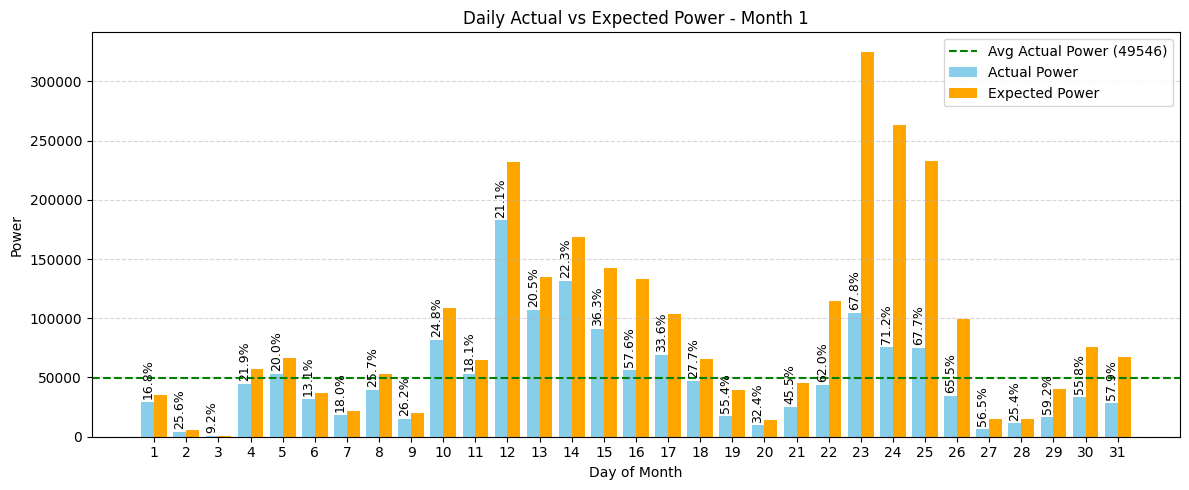

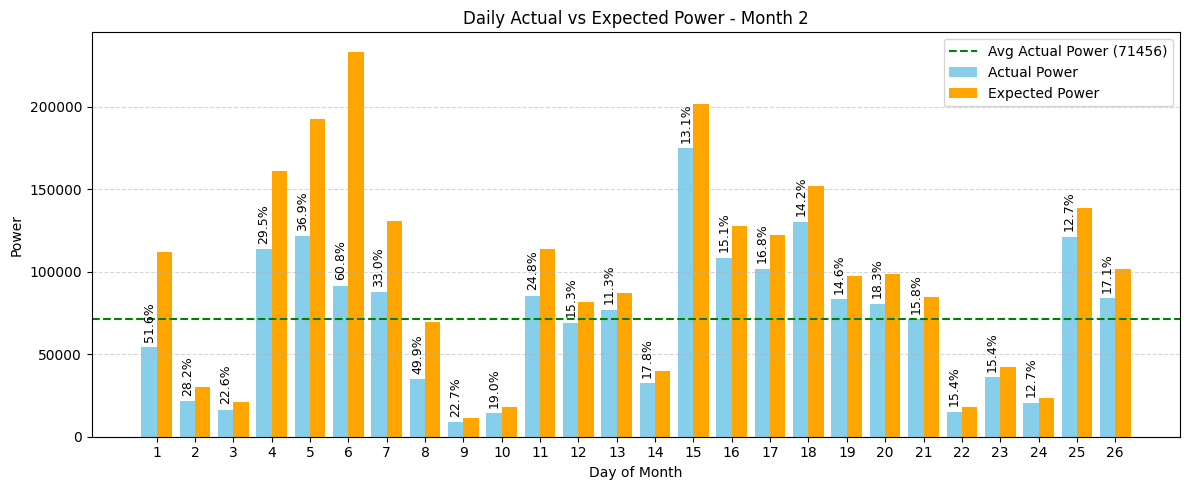

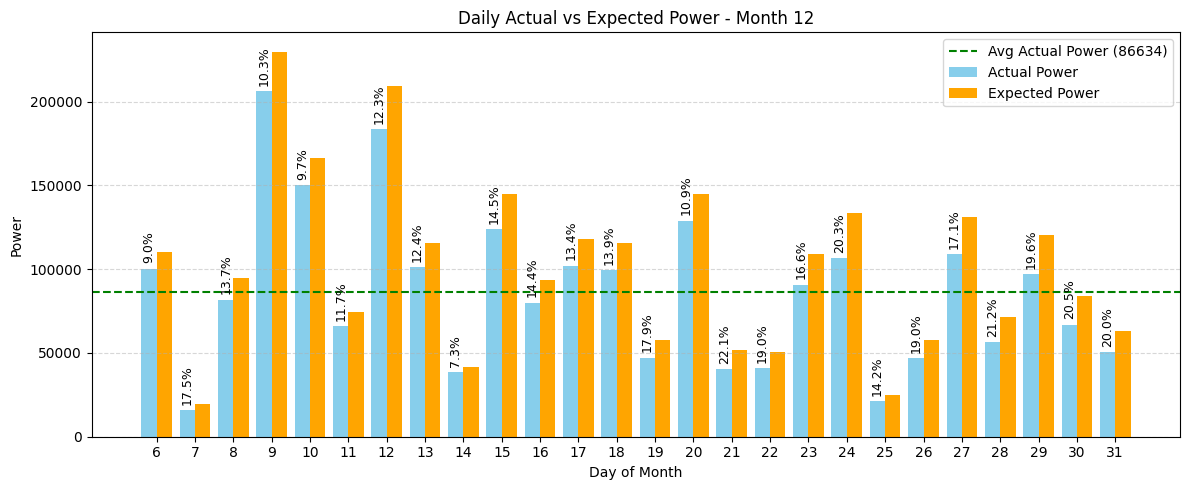

In [21]:
# Group by Day and Month, compute sums and power lost %
daily_power = df_low_power_gen_above_cutin_operational.groupby(['Month', 'Day'])[['Actual_Power', 'Expected_Power']].sum().reset_index()
daily_power['Power_lost_%'] = 100 - (daily_power['Actual_Power'] / daily_power['Expected_Power']) * 100

# Loop over each month except March
for month in sorted(daily_power['Month'].unique()):
    if month == 3:
        continue  # Skip March

    month_data = daily_power[daily_power['Month'] == month].reset_index(drop=True)
    
    plt.figure(figsize=(12, 5))

    bar_width = 0.4
    x = range(len(month_data))

    # Plot bars
    plt.bar([i - bar_width/2 for i in x], month_data['Actual_Power'], width=bar_width,
            label='Actual Power', color='skyblue')
    plt.bar([i + bar_width/2 for i in x], month_data['Expected_Power'], width=bar_width,
            label='Expected Power', color='orange')

    # Plot horizontal average line with value in label
    avg_actual_power = month_data['Actual_Power'].mean()
    plt.axhline(avg_actual_power, color='green', linestyle='--', 
            label=f'Avg Actual Power ({avg_actual_power:.0f})')


    # Annotate Power Lost % on top of Actual Power bars
    for i, val in enumerate(month_data['Power_lost_%']):
        plt.text(i - bar_width/2, month_data['Actual_Power'][i] + 5000,  # Adjust y offset as needed
                 f"{val:.1f}%", ha='center', fontsize=9, color='black', rotation=90)

    # Plot details
    plt.xlabel('Day of Month')
    plt.ylabel('Power')
    plt.title(f'Daily Actual vs Expected Power - Month {month}')
    plt.xticks(ticks=x, labels=month_data['Day'])
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

##### This graph is when wind speed more than cutin speed , turbine is operational
- We can see that december is ideal month where mostly power loss is very less
- janurary has more power losses , continuously throughout the month

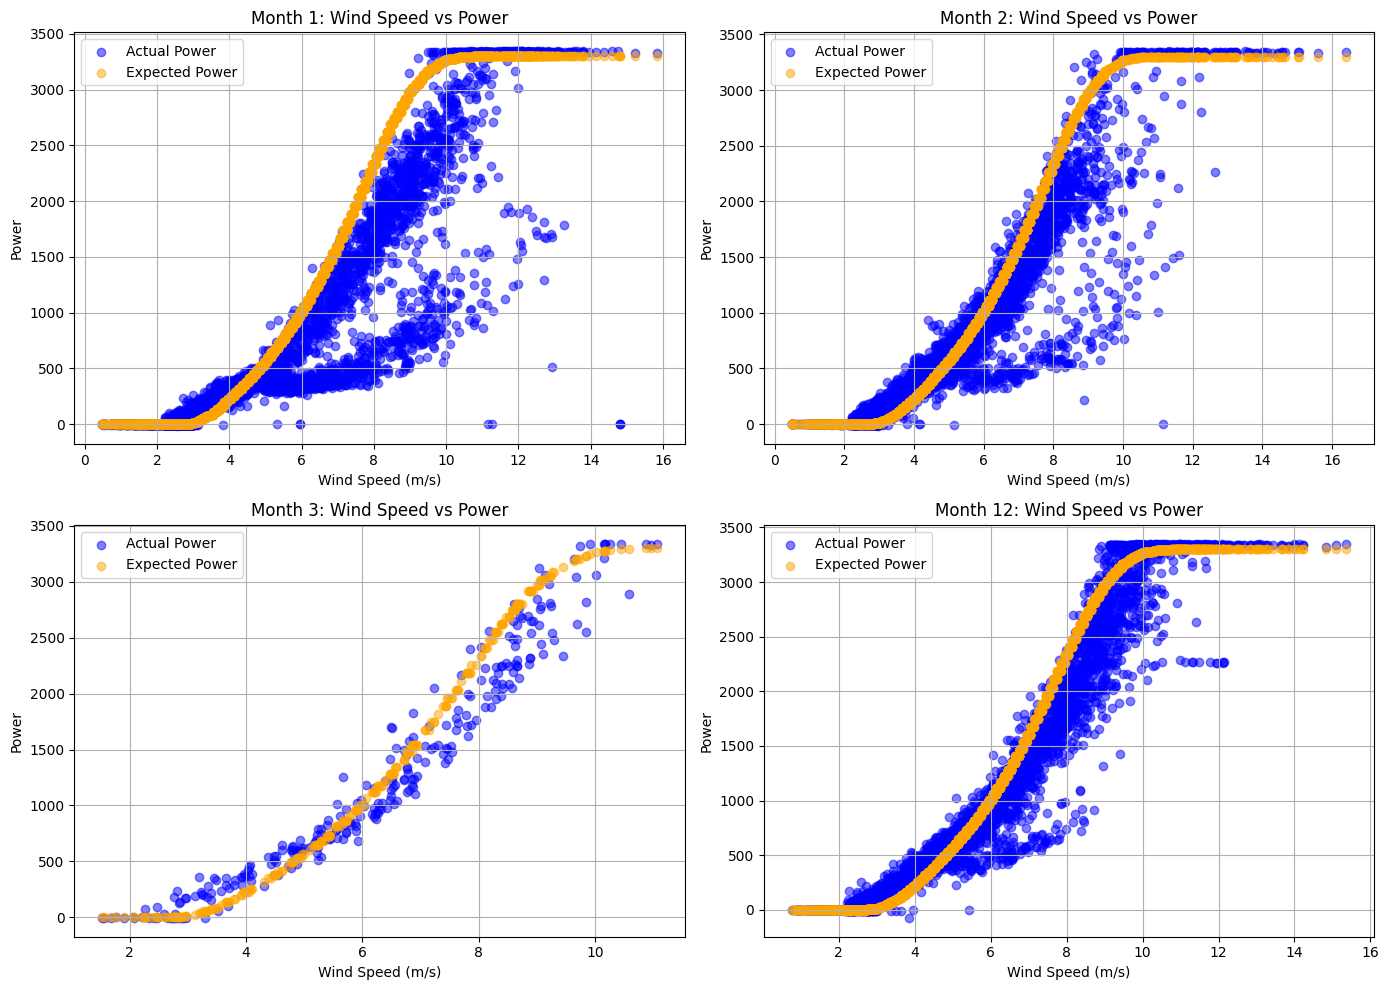

In [22]:
# Get unique months (sorted)
unique_months = sorted(df['Month'].unique())

# Set number of rows and columns for subplots
n_cols = 2
n_rows = (len(unique_months) + 1) // n_cols

plt.figure(figsize=(14, 5 * n_rows))

for idx, month in enumerate(unique_months, 1):
    month_data = df[df['Month'] == month]
    
    plt.subplot(n_rows, n_cols, idx)
    plt.scatter(month_data['Wind_Speed_ms'], month_data['Actual_Power'],
                color='blue', label='Actual Power', alpha=0.5)
    plt.scatter(month_data['Wind_Speed_ms'], month_data['Expected_Power'],
                color='orange', label='Expected Power', alpha=0.5)
    
    plt.title(f'Month {month}: Wind Speed vs Power')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Power')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

**Figure (1):** Scatter plot comparing Wind Speed vs Actual and Expected Power for selected months. Most actual power values (blue) follow the expected curve (orange), but noticeable deviations—particularly below the expected curve—indicate performance inefficiencies or downtime even at favorable wind speeds.

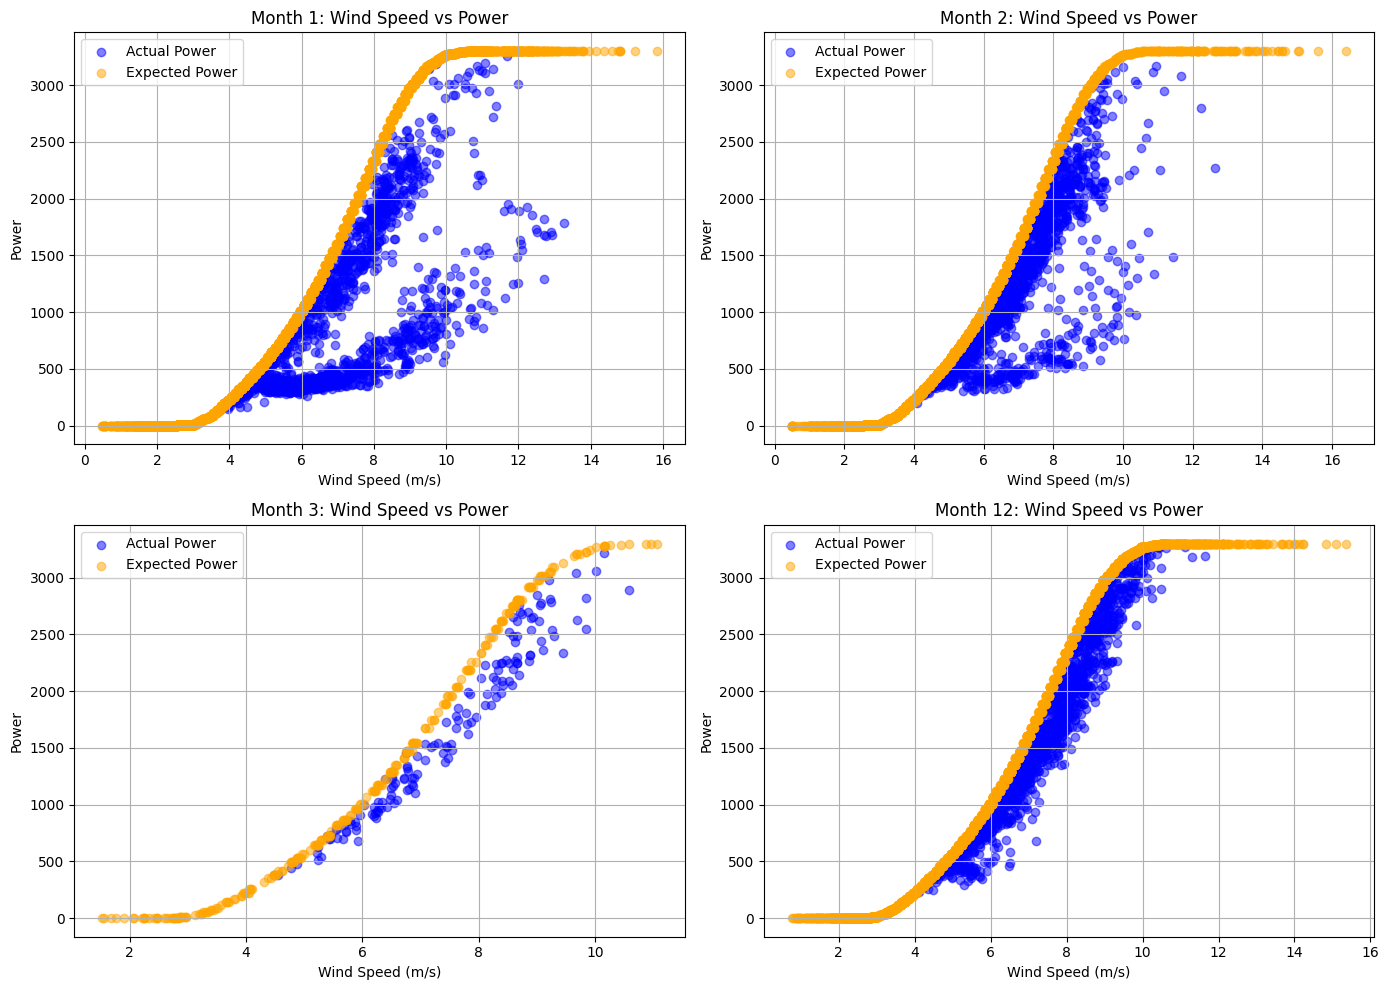

In [23]:
# Get unique months (sorted)
unique_months = sorted(df_low_power_gen_above_cutin_operational['Month'].unique())

# Set number of rows and columns for subplots
n_cols = 2
n_rows = (len(unique_months) + 1) // n_cols

plt.figure(figsize=(14, 5 * n_rows))

for idx, month in enumerate(unique_months, 1):
    actual_month_data = df_low_power_gen_above_cutin_operational[df_low_power_gen_above_cutin_operational['Month'] == month]
    expected_month_data = df[df['Month'] == month]

    plt.subplot(n_rows, n_cols, idx)
    plt.scatter(actual_month_data['Wind_Speed_ms'], actual_month_data['Actual_Power'],
                color='blue', label='Actual Power', alpha=0.5)
    plt.scatter(expected_month_data['Wind_Speed_ms'], expected_month_data['Expected_Power'],
                color='orange', label='Expected Power', alpha=0.5)

    plt.title(f'Month {month}: Wind Speed vs Power')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Power')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

**Figure (2):** Scatter plots of Wind Speed vs Power (Actual vs Expected) for selected months (under operational conditions only).
Each plot shows power output when wind speed was above cut-in threshold and the turbine was operational. The orange curve represents expected power at given wind speeds, while the blue dots represent actual power. Points significantly below the expected curve highlight underperformance despite operational status.

- **Deviation Magnitude Varies by Month:**  
  The spread of blue dots below the orange curve is wider in Months Jan and Feb compared to Month Dec, suggesting greater inefficiencies or losses during those periods.

- **Closer Alignment at High Speeds:**  
  At higher wind speeds (above ~10 m/s), actual and expected power tend to align more closely, possibly due to reduced influence of environmental or mechanical variability.

---

# 🛠️ Problem Statement
**The wind turbine is working most of the time (about 95% uptime), and the wind speed is good, especially at higher altitudes as seen from the LIDAR readings. However, the actual power and energy generated are often lower than what we expect.Since the turbine is running and getting enough wind, we are not sure why there is a loss in power. So, we reached out to the vendor to understand why the turbine is underperforming even in good conditions.**

## 🧾 Vendor Feedback

The vendor suspects the power loss may be due to the presence of **negative wind shear**, where wind speed **decreases with height**. This condition can result in **non-uniform loading across the rotor**, reducing overall turbine efficiency.

The vendor recommends verifying that the **wind shear exponent (α)** is within the optimal range of **0.0 to 0.3**, where the turbine performance is typically maximized. Values outside this range—especially **negative values (α < 0)**—may lead to **sub-optimal power extraction**, even when wind speeds are high.

## 📌 Action Items

- Analyze the LIDAR wind profile data to calculate the wind shear exponent at various times.
- Identify time periods where the shear exponent is **negative or unusually high**.
    - Below 0
    - Above 0.3
    - Between 0-0.3
- Correlate these time periods with turbine power output to confirm if **negative wind shear** is contributing to performance degradation.
- Share findings with the vendor for further analysis or turbine tuning.

In [24]:
df_low_power_gen_above_cutin_operational.head()

,Date_Time,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,Expected_Generation,Year,Month,Day,Time,%_power_gen,%_Energy_gen,Wind_speed_condition,Turbine_Status_condition
2,2025-01-23 22:40:00,9.965,12.62,14.599,12.718717,12.7,1816.368982,100.0,302.728164,3300.0,550.0,2025,1,23,22:40:00,55.041484,55.041484,Above Cut-in,Operational
3,2025-01-23 22:50:00,9.700,12.62,14.726,12.014935,12.0,1891.144006,100.0,315.190668,3300.0,550.0,2025,1,23,22:50:00,57.307394,57.307394,Above Cut-in,Operational
4,2025-01-23 23:00:00,9.698,13.00,14.726,11.715595,11.7,1952.096973,100.0,325.349495,3300.0,550.0,2025,1,23,23:00:00,59.154454,59.154454,Above Cut-in,Operational
5,2025-01-23 23:10:00,9.631,13.04,14.885,11.790098,11.8,1905.023999,100.0,317.504000,3300.0,550.0,2025,1,23,23:10:00,57.728000,57.728000,Above Cut-in,Operational
6,2025-01-23 23:20:00,9.856,12.99,14.815,12.247755,12.2,1928.463013,100.0,321.410502,3300.0,550.0,2025,1,23,23:20:00,58.438273,58.438273,Above Cut-in,Operational


In [25]:
df_low_power_gen_above_cutin_operational['Lidar_Shear_60m_140m'] = np.log(df_low_power_gen_above_cutin_operational['Lidar_140m']/df_low_power_gen_above_cutin_operational['Lidar_60m']) / np.log(140/60)
df_low_power_gen_above_cutin_operational['Lidar_Shear_140m_200m'] = np.log(df_low_power_gen_above_cutin_operational['Lidar_200m']/df_low_power_gen_above_cutin_operational['Lidar_140m']) / np.log(200/140)

In [26]:
df_low_power_gen_above_cutin_operational.head()

,Date_Time,Lidar_60m,Lidar_140m,Lidar_200m,Wind_Speed_ms,Wind_Speed_round,Actual_Power,Turbine_Status,Actual_Gen,Expected_Power,...,Year,Month,Day,Time,%_power_gen,%_Energy_gen,Wind_speed_condition,Turbine_Status_condition,Lidar_Shear_60m_140m,Lidar_Shear_140m_200m
2,2025-01-23 22:40:00,9.965,12.62,14.599,12.718717,12.7,1816.368982,100.0,302.728164,3300.0,...,2025,1,23,22:40:00,55.041484,55.041484,Above Cut-in,Operational,0.278773,0.408412
3,2025-01-23 22:50:00,9.700,12.62,14.726,12.014935,12.0,1891.144006,100.0,315.190668,3300.0,...,2025,1,23,22:50:00,57.307394,57.307394,Above Cut-in,Operational,0.310584,0.432696
4,2025-01-23 23:00:00,9.698,13.00,14.726,11.715595,11.7,1952.096973,100.0,325.349495,3300.0,...,2025,1,23,23:00:00,59.154454,59.154454,Above Cut-in,Operational,0.345840,0.349521
5,2025-01-23 23:10:00,9.631,13.04,14.885,11.790098,11.8,1905.023999,100.0,317.504000,3300.0,...,2025,1,23,23:10:00,57.728000,57.728000,Above Cut-in,Operational,0.357648,0.371017
6,2025-01-23 23:20:00,9.856,12.99,14.815,12.247755,12.2,1928.463013,100.0,321.410502,3300.0,...,2025,1,23,23:20:00,58.438273,58.438273,Above Cut-in,Operational,0.325859,0.368572


In [27]:
df_low_power_gen_above_cutin_operational[['Lidar_Shear_60m_140m','Lidar_Shear_140m_200m']].describe()

,Lidar_Shear_60m_140m,Lidar_Shear_140m_200m
count,4887.000000,4887.000000
mean,0.156508,0.209179
std,0.250198,0.273786
min,-0.638967,-1.186981
25%,0.015428,0.040951
50%,0.104035,0.167844
75%,0.266089,0.339669
max,1.756984,1.577939


- Lidar_Shear_60m_140m min = 0.638 max = 1.75
- Lidar_Shear_140m_200m min = -1.186 max = 1.57

Yes it has negative shear, lets find power in these range

In [28]:
df_low_power_gen_above_cutin_operational.groupby('Month')[["%_power_gen","%_Energy_gen"]].mean()

,%_power_gen,%_Energy_gen
Month,,
1,57.380521,57.380521
2,76.305753,76.305753
3,85.793053,85.793053
12,84.769097,84.769097


In [29]:
condition_1 = df_low_power_gen_above_cutin_operational['Lidar_Shear_60m_140m'] < 0
condition_2 = df_low_power_gen_above_cutin_operational['Lidar_Shear_60m_140m'] > 0.3
condition_3 = (~condition_1) & (~condition_2)

In [30]:
df_low_power_gen_above_cutin_operational[condition_2].groupby('Month')[["%_power_gen"]].mean()

,%_power_gen
Month,
1,59.204791
2,77.404779
3,85.387350
12,82.507254


In [31]:
df_low_power_gen_above_cutin_operational[condition_1].groupby('Month')[["%_power_gen"]].mean()

,%_power_gen
Month,
1,64.654708
2,79.359798
3,84.412245
12,84.929246


In [32]:
df_low_power_gen_above_cutin_operational[condition_3].groupby('Month')[["%_power_gen"]].mean()

,%_power_gen
Month,
1,54.059342
2,74.746854
3,86.548612
12,85.432539


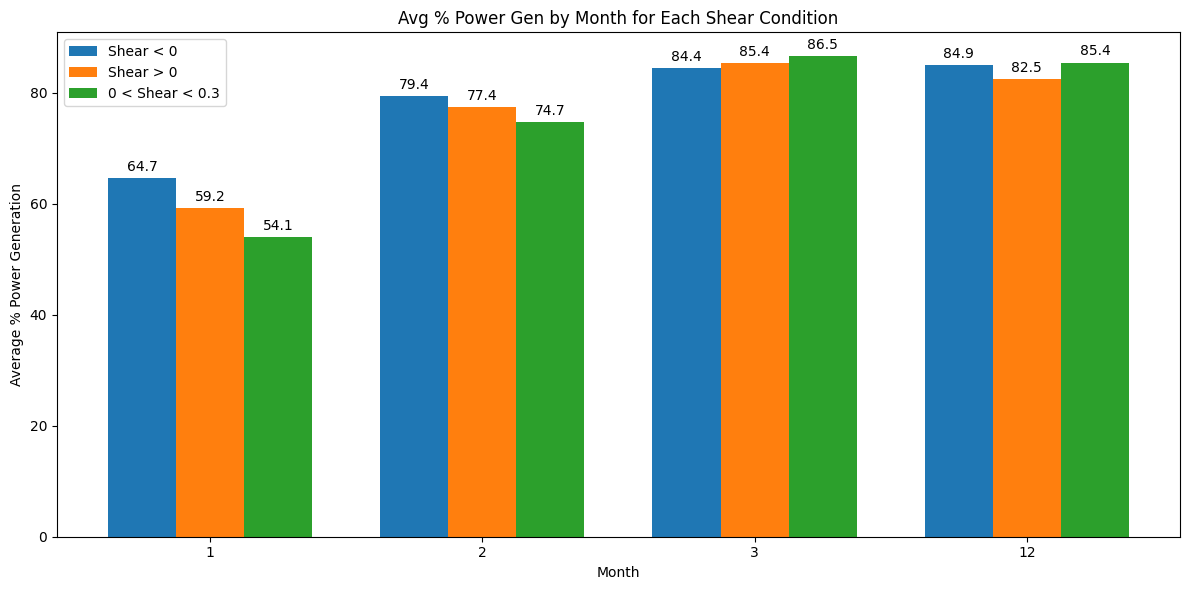

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Group by 'Month' and calculate mean %_power_gen for each condition
avg_power_1 = df_low_power_gen_above_cutin_operational[condition_1].groupby('Month')["%_power_gen"].mean()
avg_power_2 = df_low_power_gen_above_cutin_operational[condition_2].groupby('Month')["%_power_gen"].mean()
avg_power_3 = df_low_power_gen_above_cutin_operational[condition_3].groupby('Month')["%_power_gen"].mean()

# Step 2: Get all unique months from all 3 series
all_months = sorted(set(avg_power_1.index).union(avg_power_2.index).union(avg_power_3.index))

# Step 3: Align all series to same index (fill missing with NaN)
avg_power_1 = avg_power_1.reindex(all_months)
avg_power_2 = avg_power_2.reindex(all_months)
avg_power_3 = avg_power_3.reindex(all_months)

# Step 4: Plot grouped bar chart
x = np.arange(len(all_months))  # bar positions
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, avg_power_1.values, width, label='Shear < 0')
bars2 = ax.bar(x,         avg_power_2.values, width, label='Shear > 0')
bars3 = ax.bar(x + width, avg_power_3.values, width, label='0 < Shear < 0.3')

# Add value labels on top of bars
for bars in [bars1, bars2, bars3]:
    ax.bar_label(bars, fmt='%.1f', padding=3)

plt.xlabel('Month')
plt.ylabel('Average % Power Generation')
plt.title('Avg % Power Gen by Month for Each Shear Condition')
plt.xticks(x, [str(m) for m in all_months])
plt.legend()
plt.tight_layout()
plt.show()

##  📉 Results
These results are when wind speed > cut - in , power genration < 100% and wind turbine is operational
###  Vendor Assumption Doesn’t Hold in All Months

- In **January (1)** and **February (2)**, power generation is **lowest** when wind shear is in the so-called *ideal range* (**0 < α < 0.3**).
- This **contradicts** the vendor’s assumption that power generation should be highest in this range.



###  Vendor Assumption Holds in March and December

- In **March (3)** and **December (12)**, power generation is **highest** when wind shear is within the vendor-suggested range (**0 < α < 0.3**).
- This **supports** the vendor’s assumption for these months.



###  Additional Insight

- Outside the vendor-suggested region (i.e., when shear is **< 0** or **> 0.3**), **power generation is not consistently decreasing**.
- In fact, in several months, these ranges show **equal or better performance** than the ideal shear range.